In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds
tf.random.set_seed(10)
np.random.seed(10)

# Split dataset into X_train_full, y_train_full, X_valid, y_valid
(X_train_full, y_train_full), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()

In [27]:
X_train_full = X_train_full.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255

In [28]:
# Split x_train_full and y_train_full into X_train_1, X_train_2, y_train_1, y_train_2
X_train_1, X_train_2 = X_train_full[:-1000], X_train_full[-1000:]
y_train_1, y_train_2 = y_train_full[:-1000], y_train_full[-1000:]

In [29]:
# Sizes
print(len(X_train_full))
print(len(y_train_full))
print(len(X_valid))
print(len(y_valid))

print(len(X_train_1))
print(len(X_train_2))
print(len(y_train_1))
print(len(y_train_2))

60000
60000
10000
10000
59000
1000
59000
1000


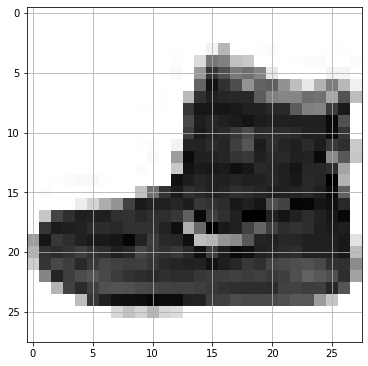

In [42]:
# Display some samples from training dataset on a 6x8 grid
plt.figure(figsize=(6,8))
plt.grid()
plt.imshow(X_train_full[0], cmap="binary")
plt.show()

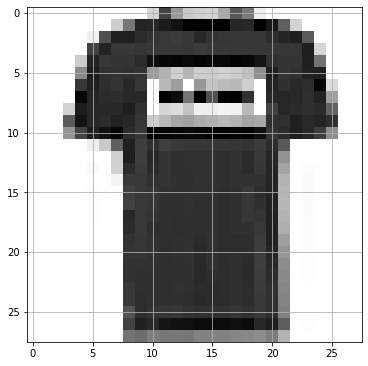

In [43]:
# Display some samples from training dataset on a 6x8 grid
plt.figure(figsize=(6,8))
plt.grid()
plt.imshow(X_train_full[1], cmap="binary")
plt.show()

In [31]:
# Encoder
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),           # stddev = 0.2
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

# Decoder
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Autoencoder
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])

# Compile
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics="accuracy")

# Fit
history = denoising_ae.fit(X_train_1, X_train_1, epochs=20,
                           validation_data=(X_valid, X_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1844/1844 [==============================] - 9s 4ms/step - loss: 0.3451 - accuracy: 0.0794 - val_loss: 0.3219 - val_accuracy: 0.0954
Epoch 2/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.3106 - accuracy: 0.0958 - val_loss: 0.3061 - val_accuracy: 0.0999
Epoch 3/20
1844/1844 [==============================] - 10s 5ms/step - loss: 0.3036 - accuracy: 0.1045 - val_loss: 0.3018 - val_accuracy: 0.1066
Epoch 4/20
1844/1844 [==============================] - 10s 5ms/step - loss: 0.2997 - accuracy: 0.1116 - val_loss: 0.2974 - val_accuracy: 0.1214
Epoch 5/20
1844/1844 [==============================] - 8s 5ms/step - loss: 0.2967 - accuracy: 0.1182 - val_loss: 0.2946 - val_accuracy: 0.1230
Epoch 6/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.1247 - val_loss: 0.2933 - val_accuracy: 0.1271
Epoch 7/20
1844/1844 [==============================] - 8s 5ms/step - loss: 0.2927 - accuracy: 0.1289 - val_loss: 0.2911 - val_accurac

In [38]:
# Clone the trained encoder
denoising_encoder_clone = keras.models.clone_model(denoising_encoder)
# Freeze the weights
denoising_encoder_clone.trainable = False

# Classifier
classifier = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

# Model 2
model2 = keras.models.Sequential([denoising_encoder_clone, classifier])

# Compile and fit
model2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.02), metrics=["accuracy"])
history2 = model2.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 30ms/step - loss: 2.5622 - accuracy: 0.1550 - val_loss: 2.1603 - val_accuracy: 0.2104
Epoch 2/20
32/32 [==============================] - 1s 24ms/step - loss: 2.0897 - accuracy: 0.2700 - val_loss: 1.8847 - val_accuracy: 0.3428
Epoch 3/20
32/32 [==============================] - 1s 25ms/step - loss: 1.8389 - accuracy: 0.3440 - val_loss: 1.6933 - val_accuracy: 0.3935
Epoch 4/20
32/32 [==============================] - 1s 24ms/step - loss: 1.7061 - accuracy: 0.3850 - val_loss: 1.5471 - val_accuracy: 0.4446
Epoch 5/20
32/32 [==============================] - 1s 24ms/step - loss: 1.5765 - accuracy: 0.4520 - val_loss: 1.4341 - val_accuracy: 0.5193
Epoch 6/20
32/32 [==============================] - 1s 44ms/step - loss: 1.4835 - accuracy: 0.4790 - val_loss: 1.3466 - val_accuracy: 0.5611
Epoch 7/20
32/32 [==============================] - 1s 45ms/step - loss: 1.4280 - accuracy: 0.4910 - val_loss: 1.2828 - val_accuracy: 0.5697
Epoch 8/20
32/32 [======

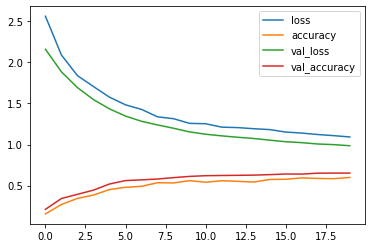

In [39]:
# Plot the results
import pandas as pd
pd.DataFrame(history2.history).plot()
plt.show()

In [40]:
# Build the encoder again
untrained_denoising_encoder_clone = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),           # stddev = 0.2
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

# Freeze the weights
untrained_denoising_encoder_clone.trainable = False

# Classifier
classifier2 = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

# Model 3
model3 = keras.models.Sequential([untrained_denoising_encoder_clone, classifier2])

# Compile and fit
model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.02), metrics=["accuracy"])
history3 = model3.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 2s 39ms/step - loss: 2.3199 - accuracy: 0.1760 - val_loss: 2.0649 - val_accuracy: 0.3115
Epoch 2/20
32/32 [==============================] - 1s 45ms/step - loss: 1.9837 - accuracy: 0.2950 - val_loss: 1.7953 - val_accuracy: 0.4115
Epoch 3/20
32/32 [==============================] - 1s 45ms/step - loss: 1.7693 - accuracy: 0.3800 - val_loss: 1.6071 - val_accuracy: 0.4804
Epoch 4/20
32/32 [==============================] - 1s 24ms/step - loss: 1.6259 - accuracy: 0.4380 - val_loss: 1.4724 - val_accuracy: 0.5260
Epoch 5/20
32/32 [==============================] - 1s 44ms/step - loss: 1.5157 - accuracy: 0.4790 - val_loss: 1.3748 - val_accuracy: 0.5402
Epoch 6/20
32/32 [==============================] - 1s 24ms/step - loss: 1.4185 - accuracy: 0.5200 - val_loss: 1.2986 - val_accuracy: 0.5830
Epoch 7/20
32/32 [==============================] - 1s 23ms/step - loss: 1.3402 - accuracy: 0.5300 - val_loss: 1.2409 - val_accuracy: 0.5851
Epoch 8/20
32/32 [======

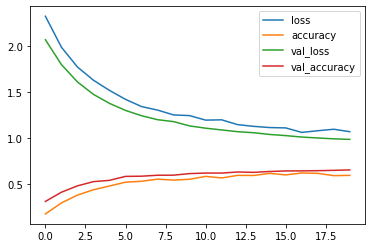

In [41]:
# Plot the results
pd.DataFrame(history3.history).plot()
plt.show()

In [ ]:
# Question 7:
# The results of model 2 and model 3 are not much different. 
# It's surprising  because I expected model 2 to perform better since it has the trained weights on 59000 images which helps it learned the features of the dataset and works like
# a transfer learning approach.
# I guess that the reason is the images are too simple (Only 28*28), so it's easy for a simple model like model 3 to catch up with a complicated model like model 2.
# Another reason maybe the number of traning epochs of the autoencoder is too few (Only 20 epochs), so the encoder hasn't learned much features of the dataset. Increasing the number 
# of training epochs of the autoencoder may help model 2 to perform better.